# importing packages

In [124]:
#installing nessaray packages
#!pip install numpy
#!pip install pandas
#!pip install seaborn 
#!pip install cufflinks
#!pip install plotly
#!pip install scikit-learn
#!pip install matplotlib

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from plotly.offline import init_notebook_mode,iplot,plot
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected=True)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import warnings
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib



In [38]:
warnings.filterwarnings('ignore')

In [2]:
#reading the data set 
df=pd.read_csv('dataset1.csv')

In [3]:
#top head values of the data set
df.head()

N    P    K    pH    EC    OC     S    Zn    Fe    Cu    Mn     B  Output
0  138  8.6  560  7.46  0.62  0.70   5.9  0.24  0.31  0.77  8.71  0.11       0
1  213  7.5  338  7.62  0.75  1.06  25.4  0.30  0.86  1.54  2.89  2.29       0
2  163  9.6  718  7.59  0.51  1.11  14.3  0.30  0.86  1.57  2.70  2.03       0
3  157  6.8  475  7.64  0.58  0.94  26.0  0.34  0.54  1.53  2.65  1.82       0
4  270  9.9  444  7.63  0.40  0.86  11.8  0.25  0.76  1.69  2.43  2.26       1

In [4]:
#seeing the tail values od the data set
df.tail()

N     P    K    pH    EC    OC      S    Zn    Fe    Cu     Mn     B   
875  351  10.7  623  7.96  0.51  0.29   7.24  0.36  4.69  0.69  11.03  0.69  \
876  264   9.0  486  7.24  0.47  0.10   3.92  0.35  8.26  0.45   7.98  0.40   
877  276   9.2  370  7.62  0.62  0.49   6.64  0.42  3.57  0.63   6.48  0.32   
878  320  13.8  391  7.38  0.65  1.07   5.43  0.58  4.58  1.02  13.25  0.53   
879  264  10.3  475  7.49  0.74  0.88  10.56  0.45  7.36  1.87  10.63  0.63   

     Output  
875       1  
876       1  
877       1  
878       2  
879       0

In [5]:
#seeing the shape of the data set
df.shape

(880, 13)

In [6]:
#size of the data set
df.size

11440

In [7]:
#info about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       880 non-null    int64  
 1   P       880 non-null    float64
 2   K       880 non-null    int64  
 3   pH      880 non-null    float64
 4   EC      880 non-null    float64
 5   OC      880 non-null    float64
 6   S       880 non-null    float64
 7   Zn      880 non-null    float64
 8   Fe      880 non-null    float64
 9   Cu      880 non-null    float64
 10  Mn      880 non-null    float64
 11  B       880 non-null    float64
 12  Output  880 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 89.5 KB


In [8]:
#seeing the column names  in the data set
df.columns

Index(['N', 'P', 'K', 'pH', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B',
       'Output'],
      dtype='object')

In [9]:
#seeing the data types of the data sets\
df.dtypes

N           int64
P         float64
K           int64
pH        float64
EC        float64
OC        float64
S         float64
Zn        float64
Fe        float64
Cu        float64
Mn        float64
B         float64
Output      int64
dtype: object

In [10]:
#seeing the description of the data set
df.describe()

N           P           K          pH          EC          OC   
count  880.00000  880.000000  880.000000  880.000000  880.000000  880.000000  \
mean   246.73750   14.562159  499.978409    7.510500    0.543659    0.617989   
std     77.38886   21.967755  124.222838    0.464912    0.141597    0.842986   
min      6.00000    2.900000   11.000000    0.900000    0.100000    0.100000   
25%    201.00000    6.800000  412.000000    7.350000    0.430000    0.380000   
50%    257.00000    8.100000  475.000000    7.500000    0.545000    0.590000   
75%    307.00000   10.550000  581.000000    7.630000    0.640000    0.780000   
max    383.00000  125.000000  887.000000   11.150000    0.950000   24.000000   

                S          Zn          Fe          Cu          Mn           B   
count  880.000000  880.000000  880.000000  880.000000  880.000000  880.000000  \
mean     7.545080    0.469273    4.140523    0.952443    8.666500    0.590159   
std      4.424184    1.894234    3.110011    0.465900    4.298828    0.570800   
min      0.640000    0.070000    0.210000    0.090000    0.110000    0.060000   
25%      4.700000    0.280000    2.050000    0.630000    6.225000    0.270000   
50%      6.640000    0.360000    3.565000    0.930000    8.345000    0.405000   
75%      8.750000    0.470000    6.320000    1.250000   11.472500    0.610000   
max     31.000000   42.000000   44.000000    3.020000   31.000000    2.820000   

           Output  
count  880.000000  
mean     0.588636  
std      0.575462  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      2.000000

In [11]:
#checking the null values of the data set
df.isna().sum()

N         0
P         0
K         0
pH        0
EC        0
OC        0
S         0
Zn        0
Fe        0
Cu        0
Mn        0
B         0
Output    0
dtype: int64

In [12]:
#seeing the values of the count
df['Output'].value_counts()

Output
1    440
0    401
2     39
Name: count, dtype: int64

# Data Visualization

<Axes: >

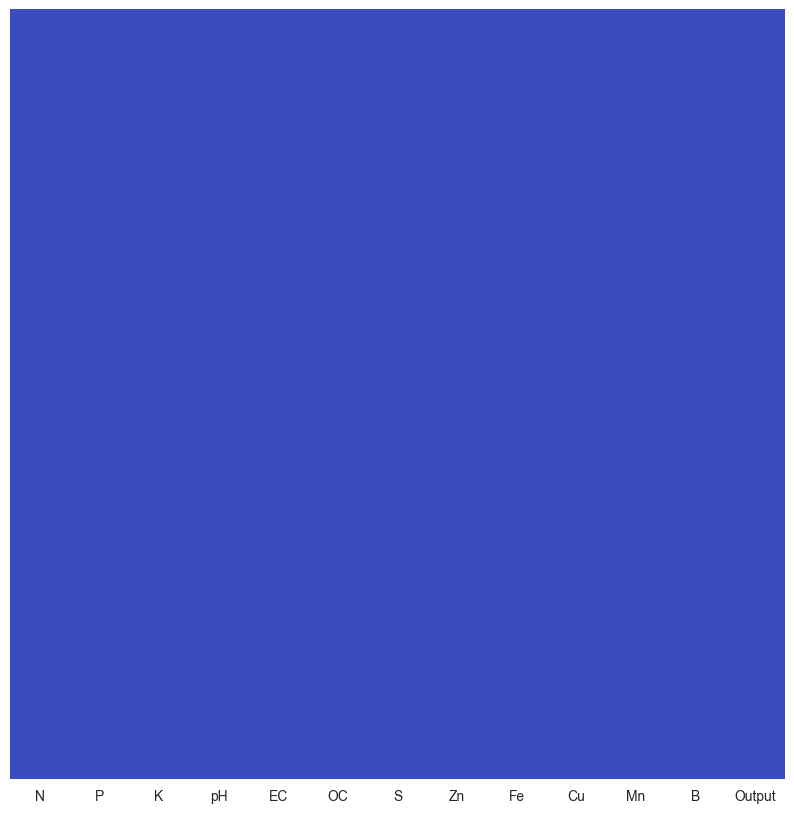

In [59]:
#visualizing the null values in the data set
plt.figure(figsize=(10,10))
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='coolwarm')

<Axes: xlabel='Output', ylabel='count'>

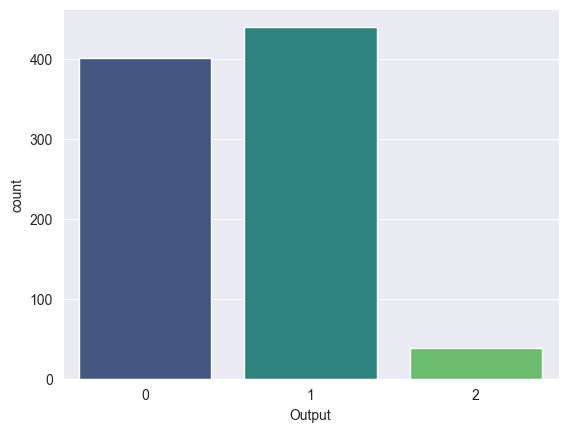

In [60]:
#see whether the data set is balanced or not
sns.countplot(x='Output',data=df,palette='viridis')

In [21]:
#let us see the distributions of the data set
df.iplot(kind='hist')

<Axes: ylabel='Frequency'>

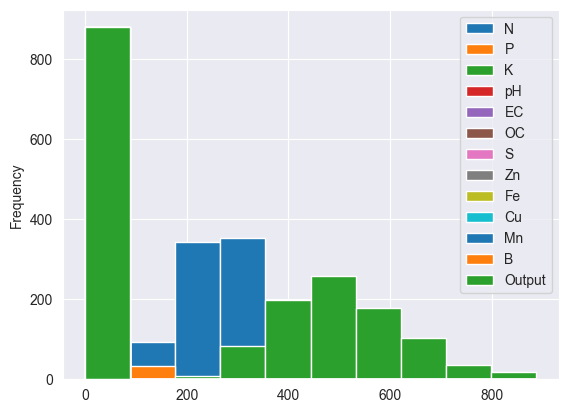

In [61]:
df.plot.hist()

<Axes: xlabel='N', ylabel='P'>

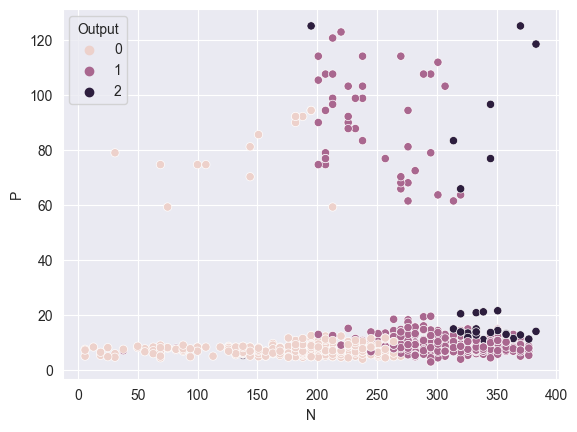

In [62]:
#let us plot the scatterplot
sns.scatterplot(x='N',y='P',data=df,hue='Output')

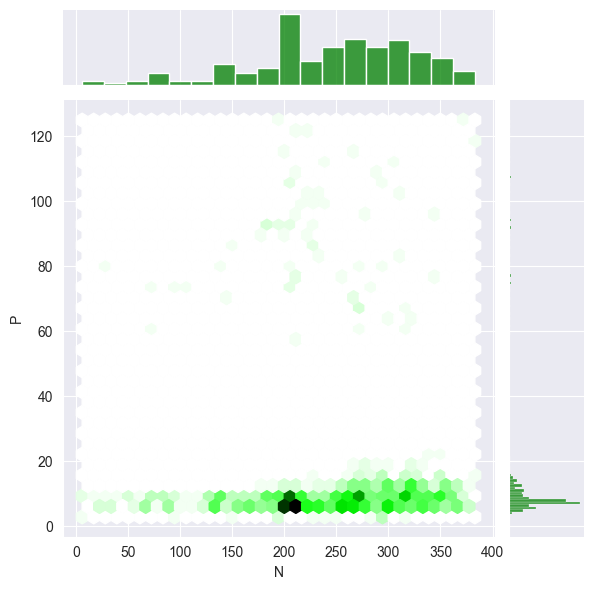

In [63]:
#jointplots 
sns.jointplot(x='N',y='P',data=df,kind='hex',color='green')

In [31]:
df.iplot(kind='scatter')

<Axes: xlabel='N'>

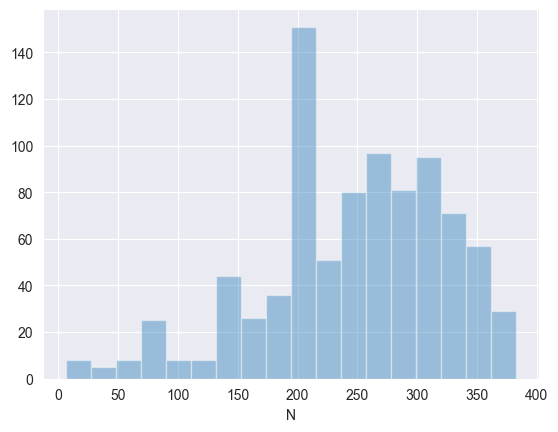

In [64]:
sns.distplot(df['N'],kde=False)

<Axes: xlabel='N', ylabel='Density'>

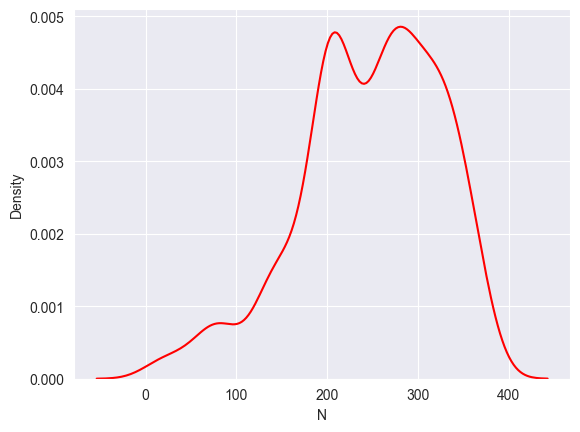

In [65]:
sns.kdeplot(df['N'],color='red')

<Figure size 1500x1500 with 0 Axes>

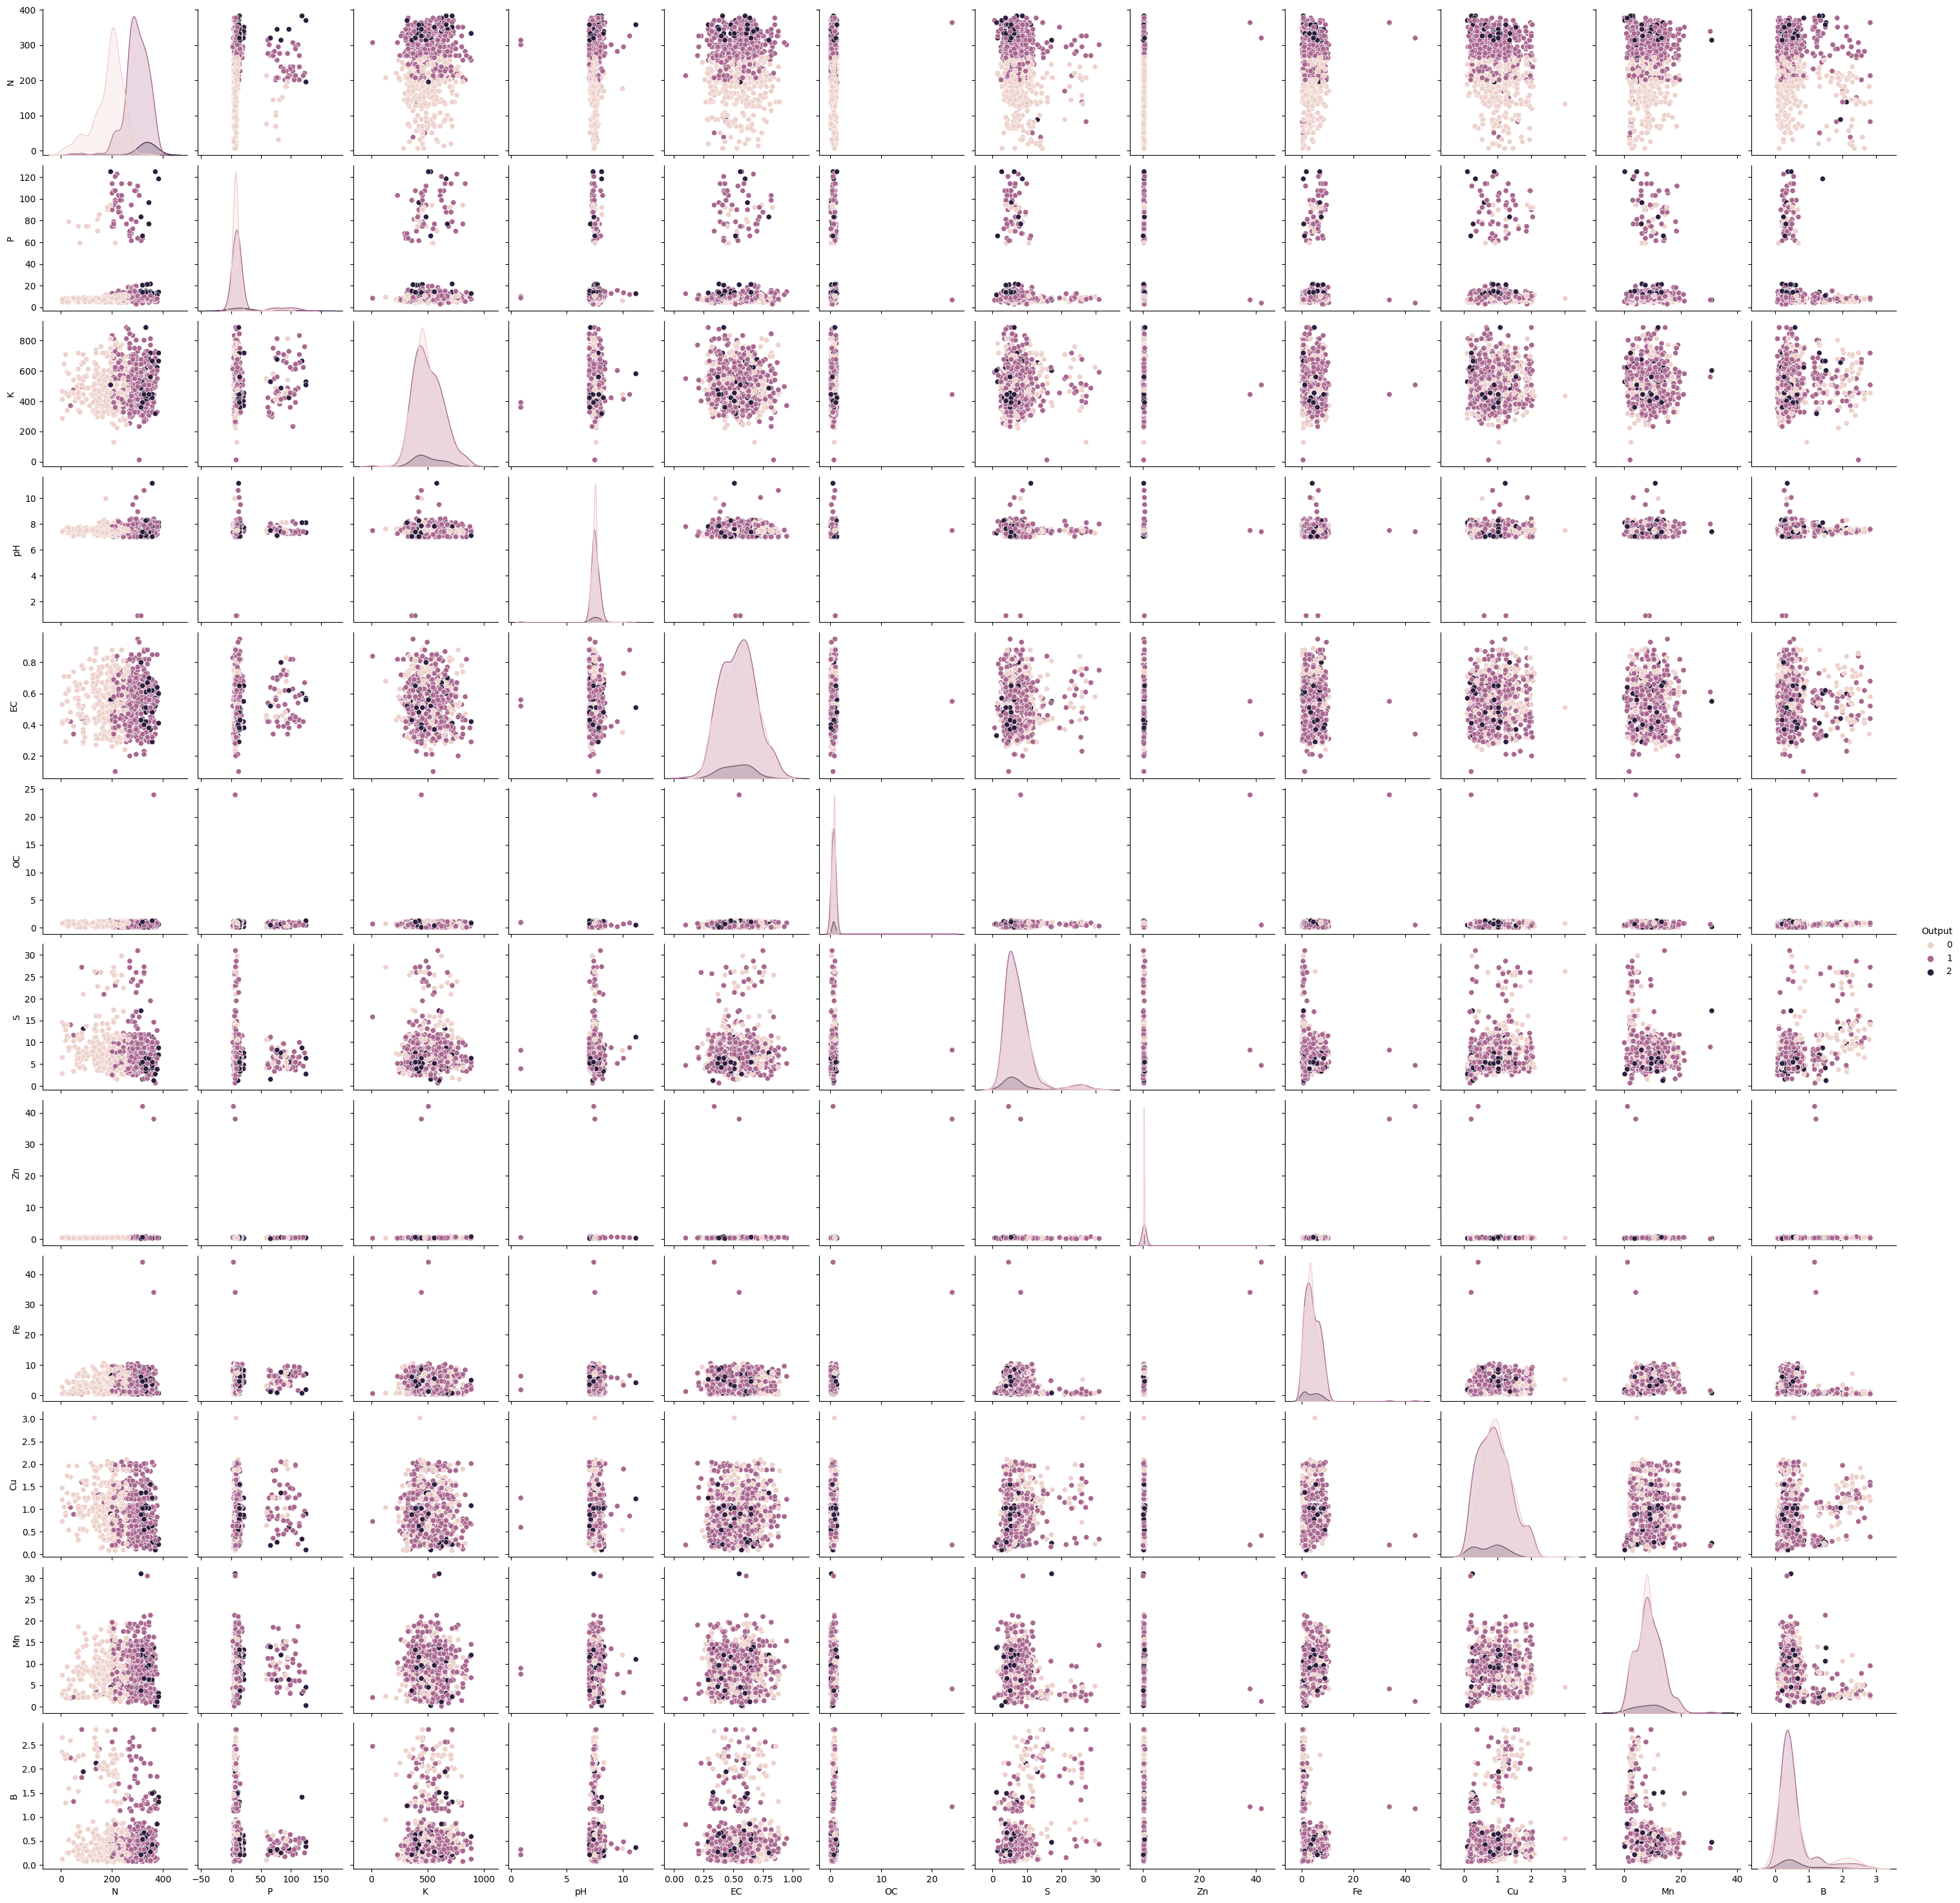

In [44]:
#multi varient analysis using the pairplot
plt.figure(figsize=(15,15))
sns.pairplot(df,hue='Output')

In [45]:
#creating the boxplots for detecting the outliers in the data set
df.iplot(kind='box')

<Axes: >

<Figure size 3000x3000 with 0 Axes>

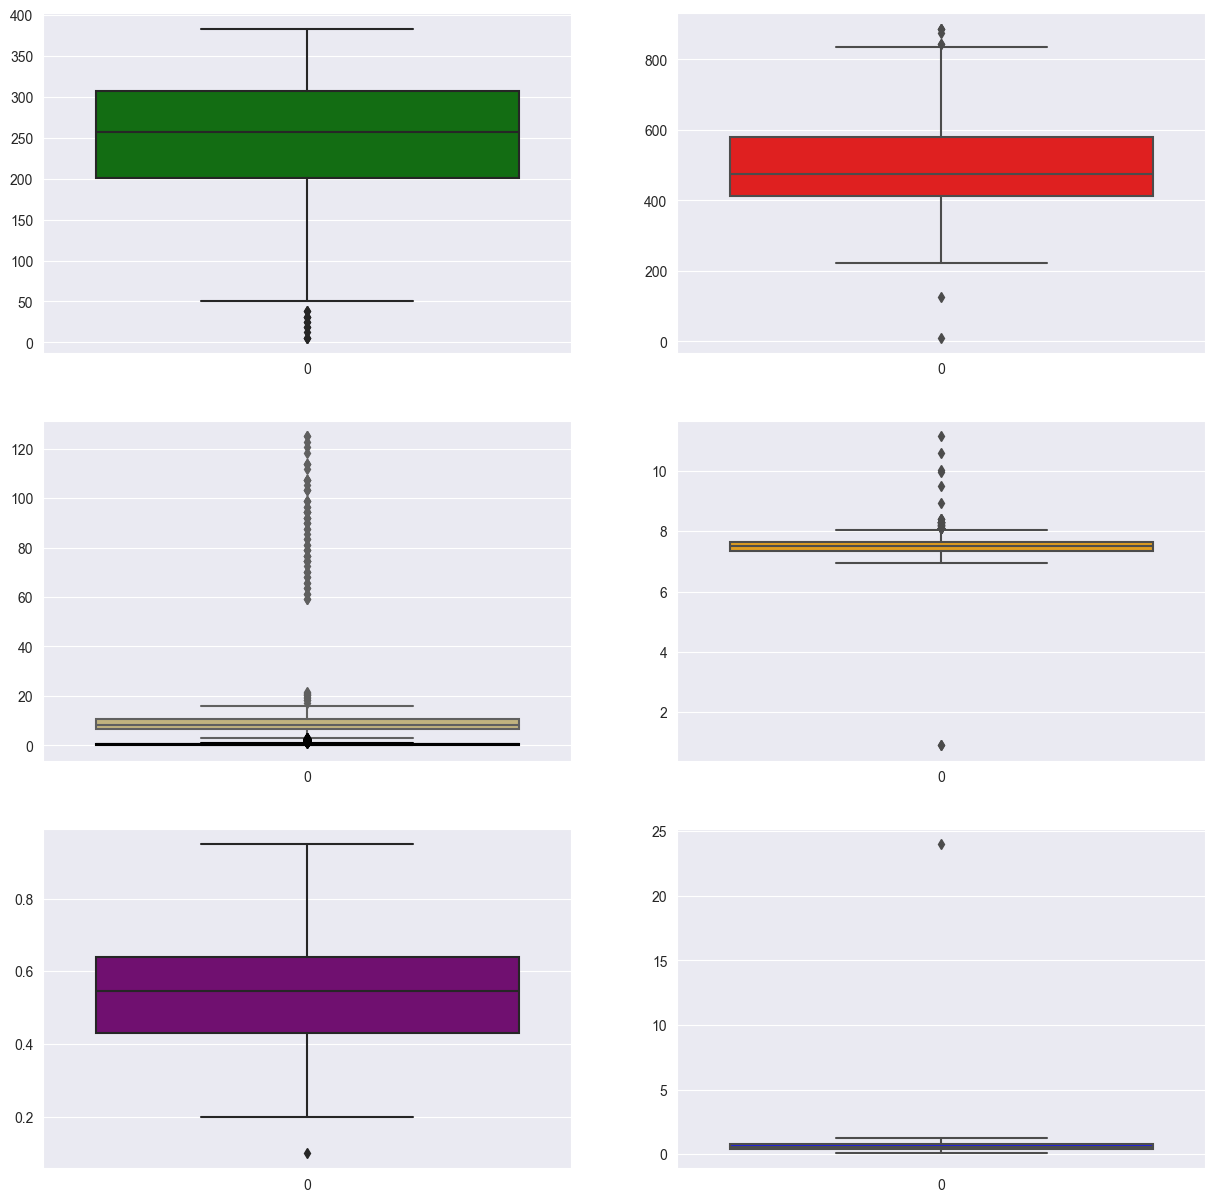

In [57]:
sns.set_color_codes()
sns.set_style('darkgrid')
plt.figure(figsize=(30,30))
fig,axs=plt.subplots(3,2,figsize=(15,15))
sns.boxplot(df["N"],color="green",ax=axs[0,0],saturation=0.7)
sns.boxplot(df["P"],color="y",ax=axs[1,0])
sns.boxplot(df["K"],color="red",ax=axs[0,1])
sns.boxplot(df["B"],color="black",ax=axs[1,0])
sns.boxplot(df["pH"],color="orange",ax=axs[1,1])
sns.boxplot(df["EC"],color="purple",ax=axs[2,0])
sns.boxplot(df["OC"],color="blue",ax=axs[2,1])

<Axes: ylabel='EC'>

<Figure size 3000x3000 with 0 Axes>

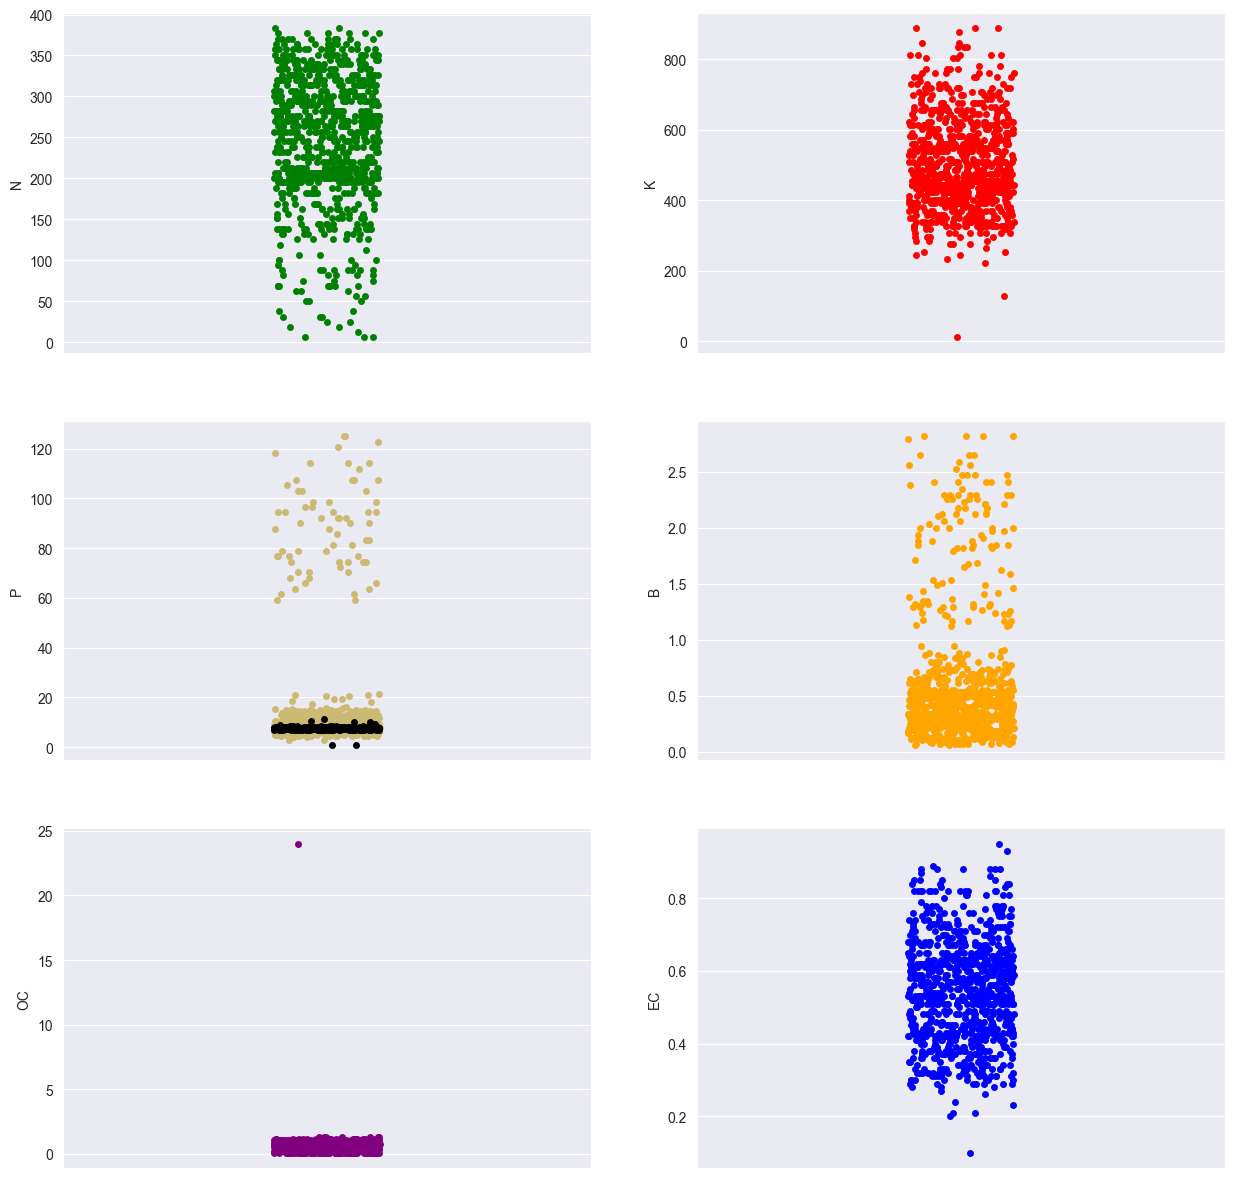

In [69]:
#strip plots
sns.set_color_codes()
plt.figure(figsize=(30,30))
fig,axs=plt.subplots(3,2,figsize=(15,15))
sns.stripplot(df["N"],color="green",ax=axs[0,0])
sns.stripplot(df["P"],color="y",ax=axs[1,0])
sns.stripplot(df["K"],color="red",ax=axs[0,1])
sns.stripplot(df["pH"],color="black",ax=axs[1,0])
sns.stripplot(df["B"],color="orange",ax=axs[1,1])
sns.stripplot(df["OC"],color="purple",ax=axs[2,0])
sns.stripplot(df["EC"],color="blue",ax=axs[2,1])


<Axes: >

<Figure size 3000x3000 with 0 Axes>

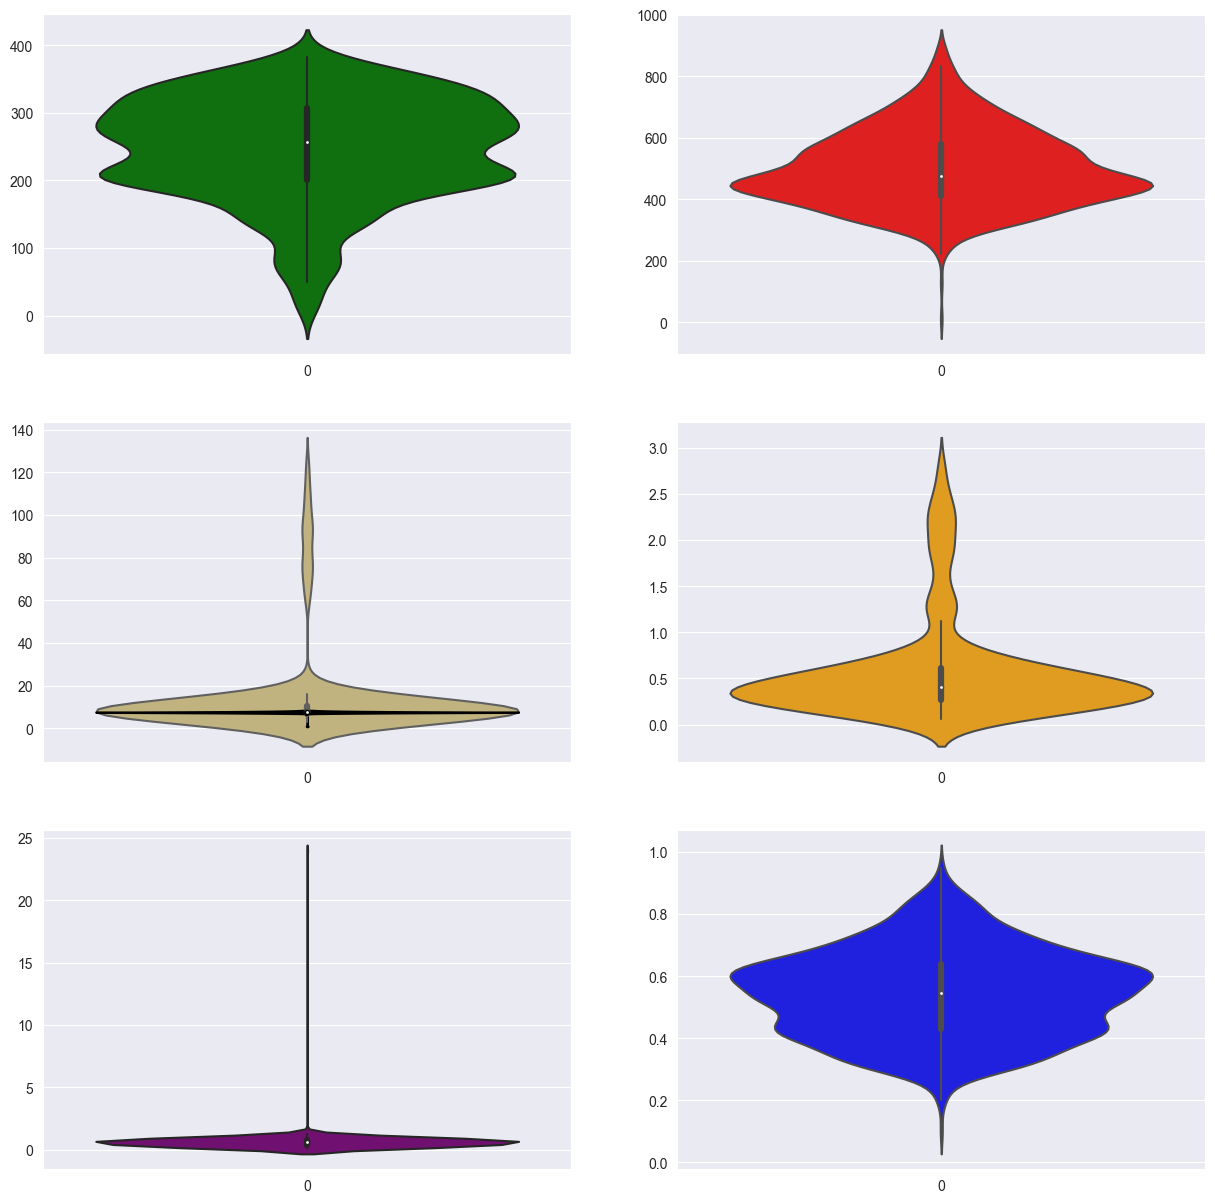

In [70]:
sns.set_color_codes()
plt.figure(figsize=(30,30))
fig,axs=plt.subplots(3,2,figsize=(15,15))
sns.violinplot(df["N"],color="green",ax=axs[0,0])
sns.violinplot(df["P"],color="y",ax=axs[1,0])
sns.violinplot(df["K"],color="red",ax=axs[0,1])
sns.violinplot(df["pH"],color="black",ax=axs[1,0])
sns.violinplot(df["B"],color="orange",ax=axs[1,1])
sns.violinplot(df["OC"],color="purple",ax=axs[2,0])
sns.violinplot(df["EC"],color="blue",ax=axs[2,1])

In [115]:
df.iplot(kind='surface',)

<Axes: xlabel='B', ylabel='Density'>

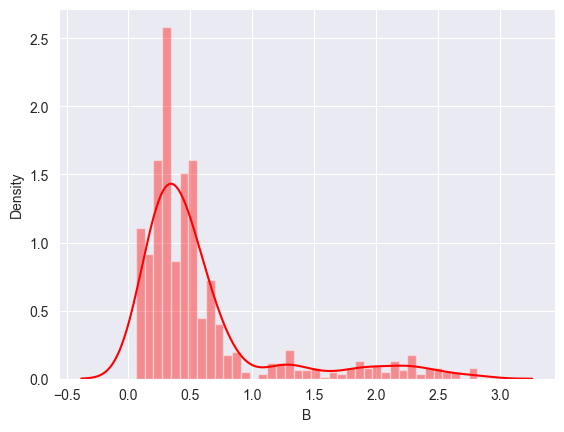

In [112]:
sns.distplot(df['B'],color='red')

<Axes: xlabel='pH', ylabel='Density'>

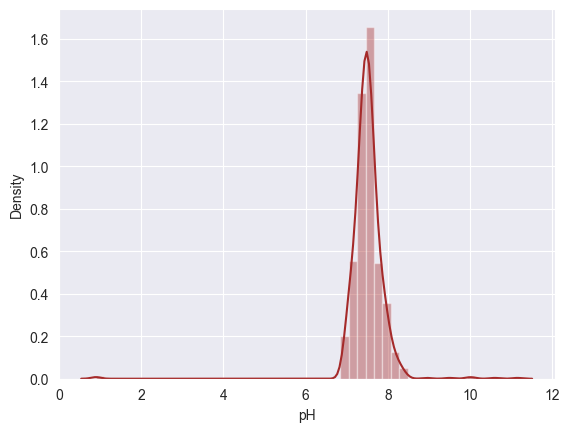

In [114]:
sns.distplot(df['pH'],color='brown')

In [72]:
df.iplot(kind='area')

<Axes: >

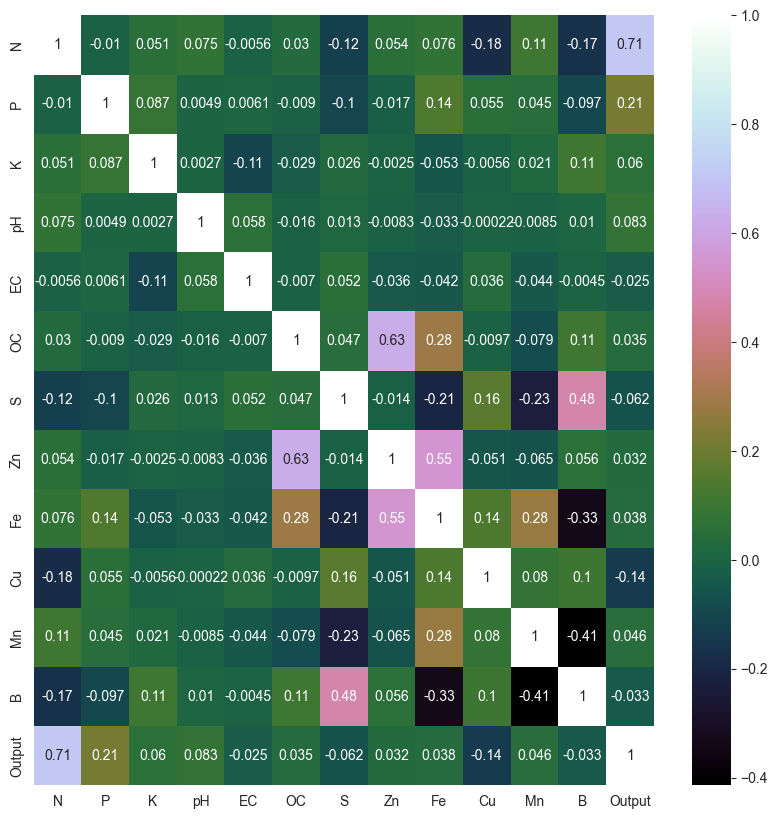

In [75]:
#checking the correlation matrix 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix')

# Handling the imbalanced Data set

In [76]:
df['Output']=df['Output'].replace(2,1)

In [77]:
df['Output'].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='Output', ylabel='count'>

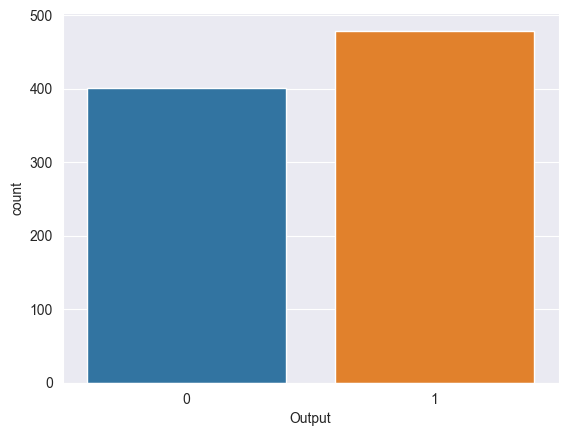

In [79]:
#checking whether the data set is balanced or not
sns.countplot(x='Output',data=df)

# Standardizing the data set

In [84]:
sc=StandardScaler()
data=sc.fit_transform(x)


In [85]:
data

array([[-1.40587851, -0.27155936,  0.48345155, ..., -0.39181586,
         0.01012479, -0.84168141],
       [-0.43619567, -0.32166123, -1.30467572, ...,  1.26183986,
        -1.3445025 ,  2.97968845],
       [-1.08265089, -0.22601221,  1.75608266, ...,  1.32626801,
        -1.38872573,  2.52392874],
       ...,
       [ 0.37833792, -0.24423107, -1.04692765, ..., -0.69248054,
        -0.50891625, -0.4735678 ],
       [ 0.94721852, -0.03471418, -0.87778047, ...,  0.14508535,
         1.06682718, -0.10545419],
       [ 0.22318867, -0.19412921, -0.20119178, ...,  1.97054946,
         0.45701215,  0.069838  ]])

In [86]:
df1=pd.DataFrame(data,columns=x.columns)

In [87]:
df1.head()

N         P         K        pH        EC        OC         S   
0 -1.405879 -0.271559  0.483452 -0.108684  0.539450  0.097342 -0.372049  \
1 -0.436196 -0.321661 -1.304676  0.235662  1.458073  0.524638  4.038050   
2 -1.082651 -0.226012  1.756083  0.171097 -0.237846  0.583985  1.527686   
3 -1.160226 -0.353544 -0.201192  0.278706  0.256797  0.382206  4.173745   
4  0.300763 -0.212348 -0.450885  0.257184 -1.015142  0.287251  0.962288   

         Zn        Fe        Cu        Mn         B  
0 -0.121106 -1.232375 -0.391816  0.010125 -0.841681  
1 -0.089413 -1.055427  1.261840 -1.344503  2.979688  
2 -0.089413 -1.055427  1.326268 -1.388726  2.523929  
3 -0.068284 -1.158379  1.240364 -1.400363  2.155815  
4 -0.115824 -1.087599  1.583981 -1.451569  2.927101

In [90]:
x=df1
y=df['Output']

# splitting of the data set

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [92]:
#checking the shape of the training and testing data set
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(704, 12)
(176, 12)
(704,)
(176,)


# Model development

In [94]:
logis=LogisticRegression()
logis.fit(x_train,y_train)



LogisticRegression()

In [95]:
#predicting the result
pred=logis.predict(x_test)

In [96]:
pred

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [97]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        82
           1       0.92      0.97      0.94        94

    accuracy                           0.94       176
   macro avg       0.94      0.94      0.94       176
weighted avg       0.94      0.94      0.94       176



<Axes: >

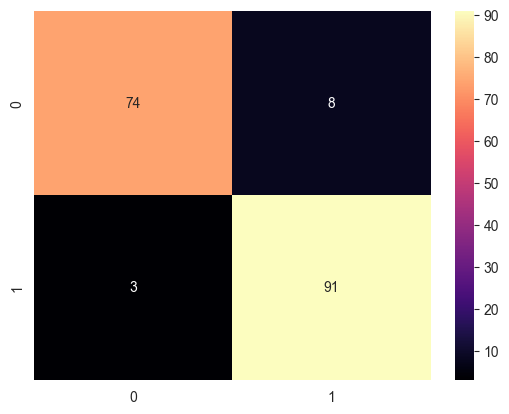

In [98]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='magma')

# SVM classifier

In [101]:
model1=SVC()
model1.fit(x_train,y_train)


SVC()

In [102]:
preds=model1.predict(x_test)

In [103]:
preds

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [104]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        82
           1       0.90      0.96      0.93        94

    accuracy                           0.92       176
   macro avg       0.92      0.92      0.92       176
weighted avg       0.92      0.92      0.92       176



<Axes: >

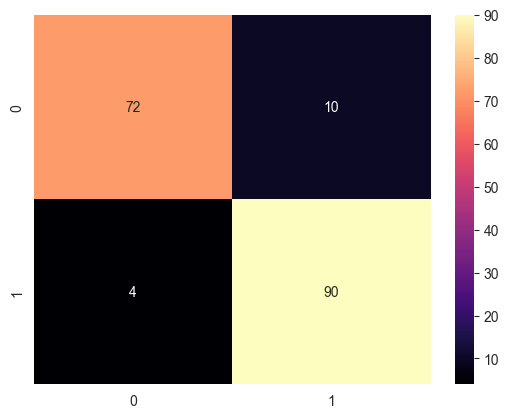

In [105]:
sns.heatmap(confusion_matrix(y_test,preds),annot=True,cmap='magma')

# Random  Forest Classifier

In [106]:
rand=RandomForestClassifier()
rand.fit(x_train,y_train)

RandomForestClassifier()

In [107]:
pre=rand.predict(x_test)

In [108]:
pre

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [109]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        82
           1       0.92      0.97      0.94        94

    accuracy                           0.94       176
   macro avg       0.94      0.94      0.94       176
weighted avg       0.94      0.94      0.94       176



<Axes: >

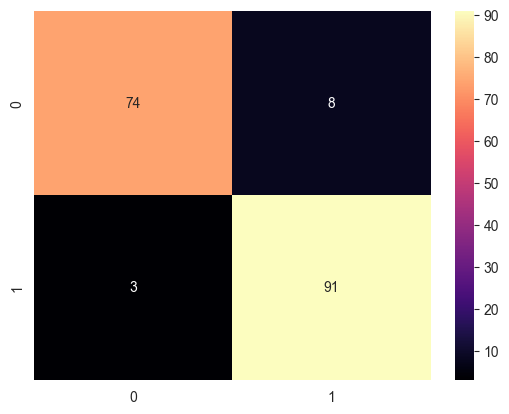

In [110]:
sns.heatmap(confusion_matrix(y_test,pre),annot=True,cmap='magma')

# Decision Tree classifier 

In [116]:
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [117]:
pres=dec.predict(x_test)

In [118]:
pres

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [119]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        82
           1       0.92      0.97      0.94        94

    accuracy                           0.94       176
   macro avg       0.94      0.94      0.94       176
weighted avg       0.94      0.94      0.94       176



<Axes: >

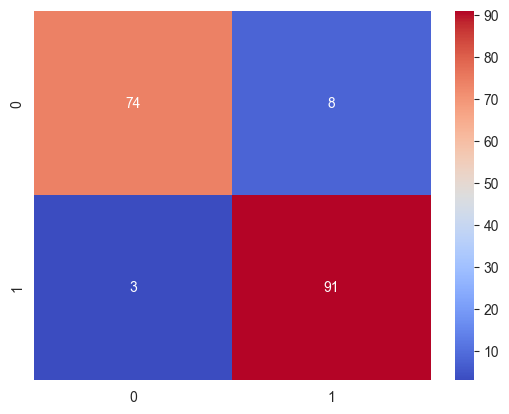

In [120]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='coolwarm')

In [123]:
joblib.dump(logis,'hackjun')

['hackjun']

In [121]:
####______________________________best accuracy model is logistic regression _____________________________

In [2]:
import joblib

In [3]:
model=joblib.load('hackjun')